In [1]:
import toytree

# load a ToyTree object from string, file path, or URL;
tre1 = toytree.tree('(((a,b),(c,d,g,h)),e);')
tre2 = toytree.tree('(((a,c),(b,d,g,h)),e);')

#tre1 = toytree.tree('(((a,b),(c,d)),e);')
#tre2 = toytree.tree('(((a,c),(e,d)),b);')

# plot will display natively in jupyter notebooks
tre1.draw();
tre2.draw();

<svg class="toyplot-canvas-Canvas" height="275.0px" id="t2b9fb2e7247a4b02a5218e89073dc5a7" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 255.0 275.0" width="255.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> h g d c b a e

<svg class="toyplot-canvas-Canvas" height="275.0px" id="tfd83a676614b4a48ac00696c180bad39" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 255.0 275.0" width="255.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> h g d b c a e

In [41]:
tre1.write(tree_format=6)

'(e,((a,b):1,(c,d,g,h):1):1);'

In [42]:
toytree.tree(tre1.write(tree_format=10)).draw();

<svg class="toyplot-canvas-Canvas" height="275.0px" id="td14fa9ede9dc48c48de7e31e9e6037ec" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 255.0 275.0" width="255.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> h g d c b a e

In [ ]:
tre1.treenode.iter_prepostorder()

In [53]:
tre1.treenode.is_leaf()

False

In [ ]:
tre1.treenode.get_n

In [6]:
c, a = tre1.draw(xbaseline=3, ybaseline = 2, orient='down', use_edge_lengths=False)
a.show = True

<svg class="toyplot-canvas-Canvas" height="255.0px" id="t3bf52328049142898cffeddcfa243abf" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 350.0 255.0" width="350.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> h g d c b a e 3 5 7 9 2 3 4 5

In [7]:
tre1.treenode.robinson_foulds(tre2.treenode,
                              expand_polytomies=False)


[4,
 20,
 {'a', 'b', 'c', 'd', 'e', 'g', 'h'},
 {('a',),
  ('a', 'b'),
  ('a', 'b', 'c', 'd', 'e', 'g', 'h'),
  ('a', 'b', 'c', 'd', 'g', 'h'),
  ('b',),
  ('c',),
  ('c', 'd', 'g', 'h'),
  ('d',),
  ('e',),
  ('g',),
  ('h',)},
 {('a',),
  ('a', 'b', 'c', 'd', 'e', 'g', 'h'),
  ('a', 'b', 'c', 'd', 'g', 'h'),
  ('a', 'c'),
  ('b',),
  ('b', 'd', 'g', 'h'),
  ('c',),
  ('d',),
  ('e',),
  ('g',),
  ('h',)},
 set(),
 set()]

In [19]:
tre1.treenode.robinson_foulds(tre2.treenode,
                              expand_polytomies=True)


[0, -2, {'a', 'b', 'c', 'd', 'e'}, set(), set(), set(), set()]

In [15]:
from toytree.RobinsonFoulds import Robinson_Foulds

self = Robinson_Foulds(
    tre1.treenode, tre2.treenode, 
    "name", "name",
    unrooted_trees=False,
    expand_polytomies=True,
    polytomy_size_limit=10,
    skip_large_polytomies=False,
    correct_by_polytomy_size=False,
    min_support_t1=0,
    min_support_t2=0,
)

rfs = self.compare_trees()
rfs[0], rfs[0] / rfs[1], rfs[:3]

(6, 0.375, [6, 16, {'a', 'b', 'c', 'd', 'e'}])

In [39]:
attr = "name"

for t1 in self.t1s:
    t1_content = t1.get_cached_content()
    t1_leaves = t1_content[t1]
    
    # get edges of the tree: set of tuples on either side of splits
    #t1_edges = self.get_edges(t1_content, t1_leaves, self.attr_t1)

    edges = set()
    for content in t1_content.values():

        names1 = tuple(sorted(
            getattr(node, attr) for node in content if 
            (
                hasattr(node, attr) and \
                (getattr(node, attr) in self.common_attrs)
            )
        ))
        edges.add(tuple(sorted(set(names1))))
    edges.discard(())

edges

{('a',),
 ('a', 'b'),
 ('a', 'b', 'c', 'd', 'e', 'g', 'h'),
 ('a', 'b', 'c', 'd', 'g', 'h'),
 ('b',),
 ('c',),
 ('c', 'd', 'g', 'h'),
 ('c', 'd', 'h'),
 ('c', 'h'),
 ('d',),
 ('e',),
 ('g',),
 ('h',)}

In [55]:
edges = set()
for content in tx_content.values():
    names1 = tuple(sorted(
        getattr(node, attr) for node in content if 
        (
            hasattr(node, attr) and \
            (getattr(node, attr) in self.common_attrs)
        )
    ))
    edges.add(tuple(sorted(set(names1))))
edges.discard(())

NameError: name 'tx_content' is not defined

In [53]:

for t1 in self.t1s:
    #print(t1)
    
    # a dictionary of {node: node.get_leaves()}
    t1_content = t1.get_cached_content()

    # a list of nodes descended from this one: [node0, node1, node2]
    t1_leaves = t1_content[t1]
    
    # get edges of the tree: set of tuples on either side of splits
    t1_edges = self.get_edges(t1_content, t1_leaves, self.attr_t1)
    print(t1_edges)

    # get support on tree ...
    t1_sdict = None
    if self.min_support_t1:
        t1_sdict = self.get_support_dict(t1_content, self.attr_t1)

    

set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()


In [144]:

t1 = aaa.treenode
attr_t1, attr_t2 = "name", "name"
common_attrs = set(aaa.get_tip_labels())
t1_content = t1.get_cached_content()

# a list of nodes descended from this one: [node0, node1, node2]
t1_leaves = t1_content[t1]

edges1 = set()
for content in t1_content.values():
    names1 = tuple(sorted(
        getattr(node, attr_t1) for node in content if 
        (
            hasattr(node, attr_t1) and \
            (getattr(node, attr_t1) in common_attrs)
        )
    ))
    edges1.add(tuple(sorted(set(names1))))
edges1.discard(())

edges1

{('a',),
 ('a', 'b'),
 ('a', 'b', 'c', 'd', 'e', 'g', 'h'),
 ('a', 'b', 'c', 'd', 'g', 'h'),
 ('b',),
 ('c',),
 ('c', 'd', 'g', 'h'),
 ('d',),
 ('e',),
 ('g',),
 ('h',)}

In [161]:
#aaa.get_edge_values("support")

In [173]:
cdict = {('a',): 100, ('a', 'b'): 99}

cdict.get(('g',), '3')

'3'

In [162]:
for branch, content in t1_content.items():
    print(branch, branch.support)


--e 100.0

--a 100.0

--b 100.0

   /-a
--|
   \-b 100.0

--c 100.0

--d 100.0

--g 100.0

--h 100.0

   /-c
  |
  |--d
--|
  |--g
  |
   \-h 100.0

      /-a
   /-|
  |   \-b
  |
--|   /-c
  |  |
  |  |--d
   \-|
     |--g
     |
      \-h 100.0

   /-e
  |
  |      /-a
--|   /-|
  |  |   \-b
  |  |
   \-|   /-c
     |  |
     |  |--d
      \-|
        |--g
        |
         \-h 100.0


In [148]:
#%%timeit 

t1 = aaa.treenode
attr_t1, attr_t2 = "name", "name"
common_attrs = set(aaa.get_tip_labels())
t1_content = t1.get_cached_content()

# a list of nodes descended from this one: [node0, node1, node2]
t1_leaves = t1_content[t1]

edges1 = set([
        tuple(sorted([getattr(n, attr_t1) for n in content if hasattr(n, attr_t1) and getattr(n, attr_t1) in common_attrs]))
        for content in six.itervalues(t1_content)])
edges1.discard(())
edges1

{('a',),
 ('a', 'b'),
 ('a', 'b', 'c', 'd', 'e', 'g', 'h'),
 ('a', 'b', 'c', 'd', 'g', 'h'),
 ('b',),
 ('c',),
 ('c', 'd', 'g', 'h'),
 ('d',),
 ('e',),
 ('g',),
 ('h',)}

In [110]:
aaa.draw();

<svg class="toyplot-canvas-Canvas" height="275.0px" id="tfbad792ade634c638a1afda6beed5534" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 255.0 275.0" width="255.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> h g d c b a e

In [ ]:
[getattr(i, 'name') for i in content]

In [16]:
toytree.mtree(aaa.treenode.expand_polytomies()).draw_tree_grid(tree_style='s');

<svg class="toyplot-canvas-Canvas" height="250.0px" id="te5177d9ea68f4310ab53151c76328a6e" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 800.0 250.0" width="800.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> h g d c b a e idx: 0
name: h
dist: 1
support: 100
height: 0 0 idx: 1
name: g
dist: 1
support: 100
height: 0 1 idx: 2
name: d
dist: 1
support: 100
height: 1 2 idx: 3
name: c
dist: 1
support: 100
height: 2 3 idx: 4
name: b
dist: 1
support: 100
height: 2 4 idx: 5
name: a
dist: 1
support: 100
height: 2 5 idx: 6
name: e
dist: 1
support: 100
height: 4 6 idx: 7
name: 7
dist: 1
support: 100
height: 1 7 idx: 8
name: 8
dist: 1
support: 100
height: 2 8 idx: 9
name: 9
dist: 1
support: 100
height: 3 9 idx: 10
name: 10
dist: 1
support: 100
height: 3 10 idx: 11
name: 11
dist: 1
support: 100
height: 4 11 idx: 12
name: 12
dist: 1
support: 100
height: 5 12 h g d c b a e idx: 0
name: h
dist: 1
support: 100
height: 0 0 idx: 1
name: g
dist: 1
support: 100
height: 0 1 idx: 2
name: d
dist: 1
support: 100
height: 0 2 idx: 3
name: c
dist: 1
support: 100
height: 0 3 idx: 4
name: b
dist: 1
support: 100
height: 1 4 idx: 5
name: a
dist: 1
support: 100
height: 1 5 idx: 6
name: e
dist: 1
support: 100
height: 3 6 idx: 7
name: 7
dist: 1
support: 100
height: 1 7 idx: 8
name: 8
dist: 1
support: 100
height: 1 8 idx: 9
name: 9
dist: 1
support: 100
height: 2 9 idx: 10
name: 10
dist: 1
support: 100
height: 2 10 idx: 11
name: 11
dist: 1
support: 100
height: 3 11 idx: 12
name: 12
dist: 1
support: 100
height: 4 12 h g c d b a e idx: 0
name: h
dist: 1
support: 100
height: 0 0 idx: 1
name: g
dist: 1
support: 100
height: 0 1 idx: 2
name: c
dist: 1
support: 100
height: 1 2 idx: 3
name: d
dist: 1
support: 100
height: 2 3 idx: 4
name: b
dist: 1
support: 100
height: 2 4 idx: 5
name: a
dist: 1
support: 100
height: 2 5 idx: 6
name: e
dist: 1
support: 100
height: 4 6 idx: 7
name: 7
dist: 1
support: 100
height: 1 7 idx: 8
name: 8
dist: 1
support: 100
height: 2 8 idx: 9
name: 9
dist: 1
support: 100
height: 3 9 idx: 10
name: 10
dist: 1
support: 100
height: 3 10 idx: 11
name: 11
dist: 1
support: 100
height: 4 11 idx: 12
name: 12
dist: 1
support: 100
height: 5 12 g c h d b a e idx: 0
name: g
dist: 1
support: 100
height: 0 0 idx: 1
name: c
dist: 1
support: 100
height: 0 1 idx: 2
name: h
dist: 1
support: 100
height: 1 2 idx: 3
name: d
dist: 1
support: 100
height: 2 3 idx: 4
name: b
dist: 1
support: 100
height: 2 4 idx: 5
name: a
dist: 1
support: 100
height: 2 5 idx: 6
name: e
dist: 1
support: 100
height: 4 6 idx: 7
name: 7
dist: 1
support: 100
height: 1 7 idx: 8
name: 8
dist: 1
support: 100
height: 2 8 idx: 9
name: 9
dist: 1
support: 100
height: 3 9 idx: 10
name: 10
dist: 1
support: 100
height: 3 10 idx: 11
name: 11
dist: 1
support: 100
height: 4 11 idx: 12
name: 12
dist: 1
support: 100
height: 5 12 h c g d b a e idx: 0
name: h
dist: 1
support: 100
height: 0 0 idx: 1
name: c
dist: 1
support: 100
height: 0 1 idx: 2
name: g
dist: 1
support: 100
height: 1 2 idx: 3
name: d
dist: 1
support: 100
height: 2 3 idx: 4
name: b
dist: 1
support: 100
height: 2 4 idx: 5
name: a
dist: 1
support: 100
height: 2 5 idx: 6
name: e
dist: 1
support: 100
height: 4 6 idx: 7
name: 7
dist: 1
support: 100
height: 1 7 idx: 8
name: 8
dist: 1
support: 100
height: 2 8 idx: 9
name: 9
dist: 1
support: 100
height: 3 9 idx: 10
name: 10
dist: 1
support: 100
height: 3 10 idx: 11
name: 11
dist: 1
support: 100
height: 4 11 idx: 12
name: 12
dist: 1
support: 100
height: 5 12

In [263]:
# recursive function to add leaves
def add_leaf(tree, label):

    yield (label, tree)

    if not isinstance(tree, TipTuple) and isinstance(tree, tuple):
        for left in add_leaf(tree[0], label):
            yield (left, tree[1])

        for right in add_leaf(tree[1], label):
            yield (tree[0], right)

# recursive function to take subtrees and return as...
def enum_unordered(labels):
    if len(labels) == 1:
        yield labels[0]
    else:
        for tree in enum_unordered(labels[1:]):
            for new_tree in add_leaf(tree, labels[0]):
                yield new_tree

In [266]:
import itertools
self = aaa.treenode
#map_attr = "name"

class TipTuple(tuple):
    pass

# store {node: ...} mapping
n2subtrees = {}

# traverse tree from tips to root
for node in self.traverse("postorder"):

    # store leaf name for tips
    if node.is_leaf():
        subtrees = [node.name]
        
    else:
        print('internal name', node.name)
        subtrees = []
        ich = itertools.product(*[n2subtrees[ch] for ch in node.children])

        for childtrees in ich:
            print('nchild', len(node.children))
            print('ctres', childtrees)
            print('enum', next(enum_unordered(childtrees)))
            
            subtrees.extend([
                TipTuple(subtree) for subtree in 
                enum_unordered([childtrees])
                ])
            
    n2subtrees[node] = subtrees
    
["{};".format(nw) for nw in n2subtrees[aaa.treenode]]

internal name 8
nchild 2
ctres ('a', 'b')
enum ('a', 'b')
internal name 7
nchild 4
ctres ('c', 'd', 'g', 'h')
enum ('c', ('d', ('g', 'h')))
internal name 9
nchild 2
ctres (('a', 'b'), ('c', 'd', 'g', 'h'))
enum (('a', 'b'), ('c', 'd', 'g', 'h'))
internal name 10
nchild 2
ctres ('e', (('a', 'b'), ('c', 'd', 'g', 'h')))
enum ('e', (('a', 'b'), ('c', 'd', 'g', 'h')))


["('e', (('a', 'b'), ('c', 'd', 'g', 'h')));"]

In [267]:
n2subtrees

{<toytree.etemini.TreeNode at 0x7f5ec1c35898>: ['e'],
 <toytree.etemini.TreeNode at 0x7f5ec1c35278>: ['a'],
 <toytree.etemini.TreeNode at 0x7f5ec1c3f7f0>: ['b'],
 <toytree.etemini.TreeNode at 0x7f5ec1c35e48>: [('a', 'b')],
 <toytree.etemini.TreeNode at 0x7f5ec1c72e10>: ['c'],
 <toytree.etemini.TreeNode at 0x7f5ec1c72358>: ['d'],
 <toytree.etemini.TreeNode at 0x7f5ec1c72278>: ['g'],
 <toytree.etemini.TreeNode at 0x7f5ec1c720f0>: ['h'],
 <toytree.etemini.TreeNode at 0x7f5ec1c3f0f0>: [('c', 'd', 'g', 'h')],
 <toytree.etemini.TreeNode at 0x7f5ec1c35f28>: [(('a', 'b'),
   ('c', 'd', 'g', 'h'))],
 <toytree.etemini.TreeNode at 0x7f5ec1c35cf8>: [('e',
   (('a', 'b'), ('c', 'd', 'g', 'h')))]}

In [262]:
polytomy_size_limit = 5
map_attr = 'name'

class TipTuple(tuple):
    pass

def add_leaf(tree, label):
    yield (label, tree)
    if not isinstance(tree, TipTuple) and isinstance(tree, tuple):
        for left in add_leaf(tree[0], label):
            yield (left, tree[1])
        for right in add_leaf(tree[1], label):
            yield (tree[0], right)

def enum_unordered(labels):
    if len(labels) == 1:
        yield labels[0]
    else:
        for tree in enum_unordered(labels[1:]):
            for new_tree in add_leaf(tree, labels[0]):
                yield new_tree

n2subtrees = {}
for n in self.traverse("postorder"):
    if n.is_leaf():
        subtrees = [getattr(n, map_attr)]
    else:
        subtrees = []
        if len(n.children) > polytomy_size_limit:
            if skip_large_polytomies:
                for childtrees in itertools.product(*[n2subtrees[ch] for ch in n.children]):
                    subtrees.append(TipTuple(childtrees))
            else:
                raise TreeError("Found polytomy larger than current limit: %s" %n)
        else:
            for childtrees in itertools.product(*[n2subtrees[ch] for ch in n.children]):
                subtrees.extend([TipTuple(subtree) for subtree in enum_unordered(childtrees)])

    n2subtrees[n] = subtrees
ttt = (["%s;"%str(nw) for nw in n2subtrees[self]]) # tuples are in newick format ^_^

In [270]:
class TipTuple(tuple):
    pass

# recursive function to add leaves
def add_leaf(tree, label):
    yield (label, tree)
    if not isinstance(tree, TipTuple) and isinstance(tree, tuple):
        for left in add_leaf(tree[0], label):
            yield (left, tree[1])
        for right in add_leaf(tree[1], label):
            yield (tree[0], right)

# recursive function to take subtrees and return as...
def enum_unordered(labels):
    if len(labels) == 1:
        yield labels[0]
    else:
        for tree in enum_unordered(labels[1:]):
            for new_tree in add_leaf(tree, labels[0]):
                yield new_tree

# traverse tree from tips to root
n2subtrees = {}
for n in self.traverse("postorder"):

    # store leaf name for tips
    if n.is_leaf():
        subtrees = [getattr(n, map_attr)]

    # get node descendants
    else:
        subtrees = []

        # get ways of sampling the children 
        ich = itertools.product(*[n2subtrees[ch] for ch in n.children])

        # if not above poly size limit
        if len(n.children) <= polytomy_size_limit:

            # store subtrees for all enum_ordered children
            for childtrees in ich:

                # get all resolutions of this subclade
                resolutions = [
                    TipTuple(subtree) for subtree in 
                    enum_unordered(childtrees)
                ]
                subtrees.extend(resolutions)

        # check if too big of polytomy
        else:
            if not skip_large_polytomies:
                raise TreeError(
                    "Found polytomy larger than current limit: {}"
                    .format(len(n.children)))
            else:
                for childtrees in ich:
                    subtrees.append(TipTuple(childtrees))

    # store nodename: [desc]
    n2subtrees[n] = subtrees

In [290]:
toytree.tree(str(n2subtrees[n][0]).replace("'", "") + ";").draw()

(<toyplot.canvas.Canvas at 0x7f5ec0031128>,
 <toyplot.coordinates.Cartesian at 0x7f5ec0031470>)

<svg class="toyplot-canvas-Canvas" height="275.0px" id="t3fa440d3315a4fdfb694f85d41299503" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 255.0 275.0" width="255.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> h g d c b a e

In [254]:
toytree.mtree(ttt).draw_tree_grid()

(<toyplot.canvas.Canvas at 0x7f5ec18ea630>,
 <toyplot.coordinates.Cartesian at 0x7f5ec19321d0>)

<svg class="toyplot-canvas-Canvas" height="250.0px" id="ta56e01a080574f17a22c7cb48118f417" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 800.0 250.0" width="800.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> 'h' 'g' 'd' 'c' 'b' 'a' 'e' 'h' 'g' 'd' 'c' 'b' 'a' 'e' 'h' 'g' 'c' 'd' 'b' 'a' 'e' 'g' 'c' 'h' 'd' 'b' 'a' 'e' 'h' 'c' 'g' 'd' 'b' 'a' 'e'

In [34]:
def add(tree, label):
    yield (label, tree)

In [105]:
add(aaa.treenode, 'h')

<generator object add at 0x7f5ec1c89308>

In [2]:
tre.treenode.expand_polytomies()

IndexError: string index out of range

In [ ]:
itertools.product(*[n2subtrees[ch] for ch in n.children]):

In [2]:
import toytree

# load a ToyTree object from string, file path, or URL;
tre = toytree.tree('(((a,b),(c,d)),e);')

# plot will display natively in jupyter notebooks
tre.draw();

# or, save returned objects to variables
canvas, axes = tre.draw()

<svg class="toyplot-canvas-Canvas" height="275.0px" id="te5dcba31c1dc45119938f6a66bfcac43" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 255.0 275.0" width="255.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> d c b a e

<svg class="toyplot-canvas-Canvas" height="275.0px" id="t78f621817316484ab76762570955c15e" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 255.0 275.0" width="255.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> d c b a e

In [3]:
# load tree from URL
import toytree
tre = toytree.tree("https://eaton-lab.org/data/Cyathophora.tre")

# root on shared character in outgroup clade names
rtre = tre.root(wildcard="prz")

# (a) draw tree with default style
rtre.draw();

# (b) draw tree with advanced styling
styledict = {node_sizes=..., node_colors=..., tip_labels=...}
rtre.draw(**styledict)

# (c) draw tree on same coordinates with other data
canvas = toyplot.Canvas()
ax0 = canvas.cartesian(grid=(1, 2, 0))
ax1 = canvas.cartesian(grid=(1, 2, 1))
rtre.draw(axes=ax0, **styledict)
ax1.scatterplot(data)

SyntaxError: invalid syntax (<ipython-input-3-a4ed91f43098>, line 12)

In [ ]:
# load tree from URL and root on outgroup
tre = toytree.tree("https://eaton-lab.org/data/Cyathophora.tre")
rtre = tre.root(wildcard="prz")

# get list of styled tip labels from tree in correct plot order
tip_labels = [
    "<i>P. {}</i>".format(i.split("_")[1]) 
    for i in rtre.get_tip_labels()
]

# get list of edge colors from tree in correct plot order
edge_colors = rtre.get_edge_values_from_dict({
    24: toytree.colors[0], 
    16: toytree.colors[1],
})

# get list of node sizes in correct plot order
node_sizes = [8 if i else 0 for i in rtre.get_node_values()]

In [7]:
# construct a list of node colors based on support values returned in node plot order
node_colors = [
    "grey" if i==100 else "lightgrey" 
    for i in tree.get_node_values("support")
]

# create a style dictionary w/ lists of values ordered in node plot order
styledict = {
    "tip_labels_align": True,
    "tip_labels": tip_labels,
    "edge_colors": edge_colors,
    "node_sizes": node_sizes,
    "node_colors": node_colors,
    "node_labels": node_labels,
    "node_style": {"stroke": "#262626"},
}

# Figure 1a: draw tree with default style
tree.draw()

# Figure 1b: draw tree with style dictionary applied
tree.draw(**styledict)

<svg class="toyplot-canvas-Canvas" height="275.0px" id="t3ba27545eee64347a0507062cee70e18" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 380.0 275.0" width="380.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> P. rex P. rex P. rex P. rex P. rex P. thamno P. thamno P. cyathophylloides P. cyathophylloides P. cyathophylla P. superba P. przewalskii P. przewalskii

In [5]:
# add styling to nodes, edges, tips and axes
rtre.draw(
    
    # style tip labels, align, italicize, and trim accession
    tip_labels_align=True,
    tip_labels=tips,
    
    # style nodes, exclude root and tips
    node_sizes=[8 if i else 0 for i in rtre.get_node_values()],
    node_style={"stroke": "#262626", "fill": "grey"},
    
    # style node labels, shift support values from nodes
    node_labels=rtre.get_node_values("support"),
    node_labels_style={
        "-toyplot-anchor-shift": "-10px",
        "baseline-shift": "5px"
    },
    
    # style edge labels, color descendants of nodes by index
    edge_colors=edges,
    
    # add a scale bar to the x axis
    scalebar=True,
);

<svg class="toyplot-canvas-Canvas" height="275.0px" id="t056e07440de54f8b905a57042f226d25" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 380.0 275.0" width="380.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> P. rex P. rex P. rex P. rex P. rex P. thamno P. thamno P. cyathophylloides P. cyathophylloides P. cyathophylla P. superba P. przewalskii P. przewalskii 100 96 100 99 100 100 100 100 100 100 100 0.00 0.02 0.03

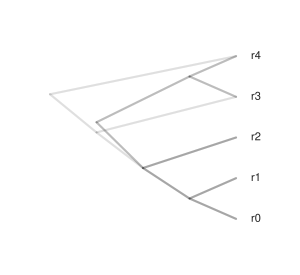

In [25]:
mtre = toytree.mtree([toytree.rtree.coaltree(5) for i in range(10)])
mtre.draw_cloud_tree(use_edge_lengths=False);

In [34]:
trees = """\
(((a:1,b:1):1,(d:1.5,e:1.5):0.5):1,c:3);
(((a:1,d:1):1,(b:1,e:1):1):1.25,c:3.25);
(((b:1.5,d:1.5):0.75,(a:1,e:1):1.25):1.5,c:3.75);
(((a:1.5,b:1.5):1,(d:1,e:1):1.5):1,c:3.5);
(((a:1.25,b:1.25):0.75,(d:1,e:1):1):1,c:3);
(((a:1,b:1):1,(d:1.5,e:1.5):0.5):1,c:3);
(((a:1,b:1):1,(d:1.5,e:1.5):0.5):2,c:4);
(((a:1.5,b:1.5):0.5,(d:1,e:1):1):1,c:3);
"""

<svg class="toyplot-canvas-Canvas" height="250.0px" id="t5a5c31746edc441eb3353365cb5de4a7" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 525.0 250.0" width="525.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> e d b a c e b d a c e a d b c

<svg class="toyplot-canvas-Canvas" height="250.0px" id="tc3004e16493a45cf95b536240542ced8" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 525.0 250.0" width="525.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> e d b a c e d b a c e d b a c

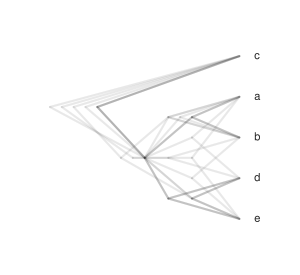

In [45]:
# load a multitree object from a list of newick strings
mtre = toytree.mtree(trees)

# Fig. 3a: draw a grid of trees
mtre.draw_tree_grid(nrows=1, ncols=3, edge_type='c');

# Fig. 3b: draw a grid of trees with fixed tip order to show discordance
mtre.draw_tree_grid(nrows=1, ncols=3, edge_type='c', fixed_order=True);

# Fig. 3c: draw a cloud of trees overlapping to show discordance
mtre.draw_cloud_tree(edge_style={"stroke-opacity": 0.1}, edge_type='c');